In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
print(f"Survival Rate: {train['Survived'].mean():.2%}")

Survival Rate: 38.38%


Text(0.5, 1.0, 'Survival by Gender')

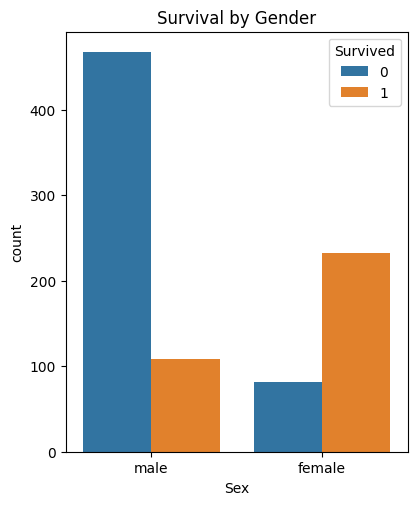

In [12]:
plt.figure(figsize=(15, 12))
plt.subplot(2,3,1)
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival by Gender')


In [13]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

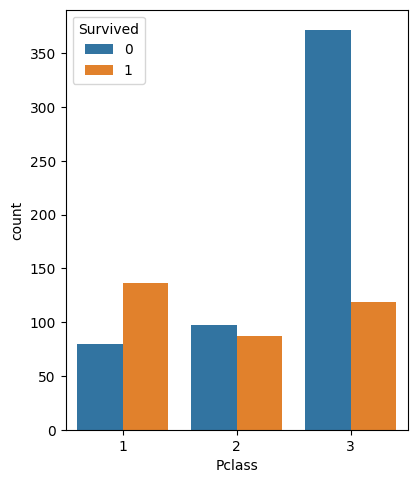

In [14]:
plt.figure(figsize=(15, 12))
plt.subplot(2,3,2)
sns.countplot(data=train, x='Pclass', hue='Survived')

Text(0.5, 1.0, 'Age Distribution by Survival')

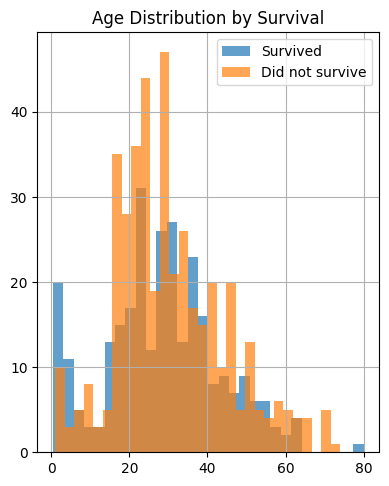

In [15]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 3)
train[train['Survived']==1]['Age'].hist(alpha=0.7, label='Survived', bins=30)
train[train['Survived']==0]['Age'].hist(alpha=0.7, label='Did not survive', bins=30)
plt.legend()
plt.title('Age Distribution by Survival')

Text(0.5, 1.0, 'Survival by Port of Embarkation')

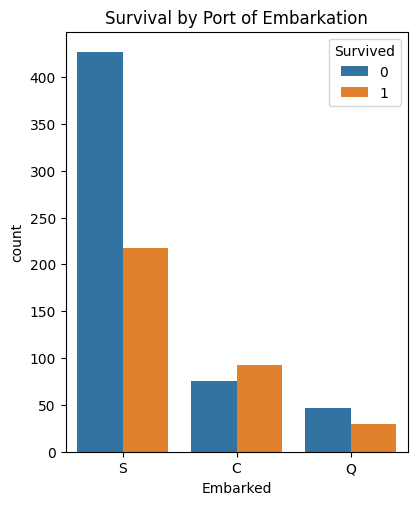

In [16]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 4)
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.title('Survival by Port of Embarkation')

Text(0.5, 0, 'Fare')

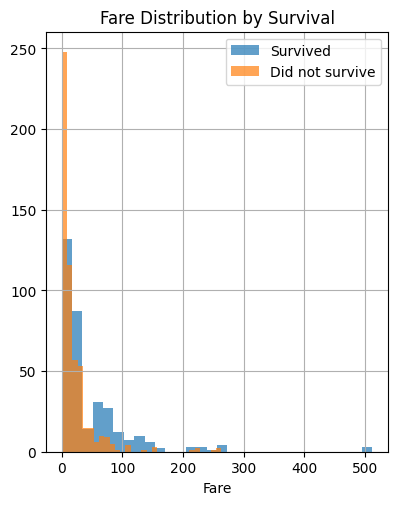

In [17]:

plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 5)
train[train['Survived']==1]['Fare'].hist(alpha=0.7, label='Survived', bins=30)
train[train['Survived']==0]['Fare'].hist(alpha=0.7, label='Did not survive', bins=30)
plt.legend()
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')

Text(0.5, 1.0, 'Survival by Family Size')

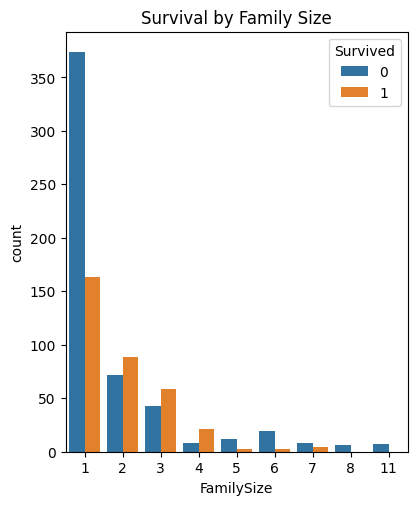

In [18]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 6)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.countplot(data=train, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')

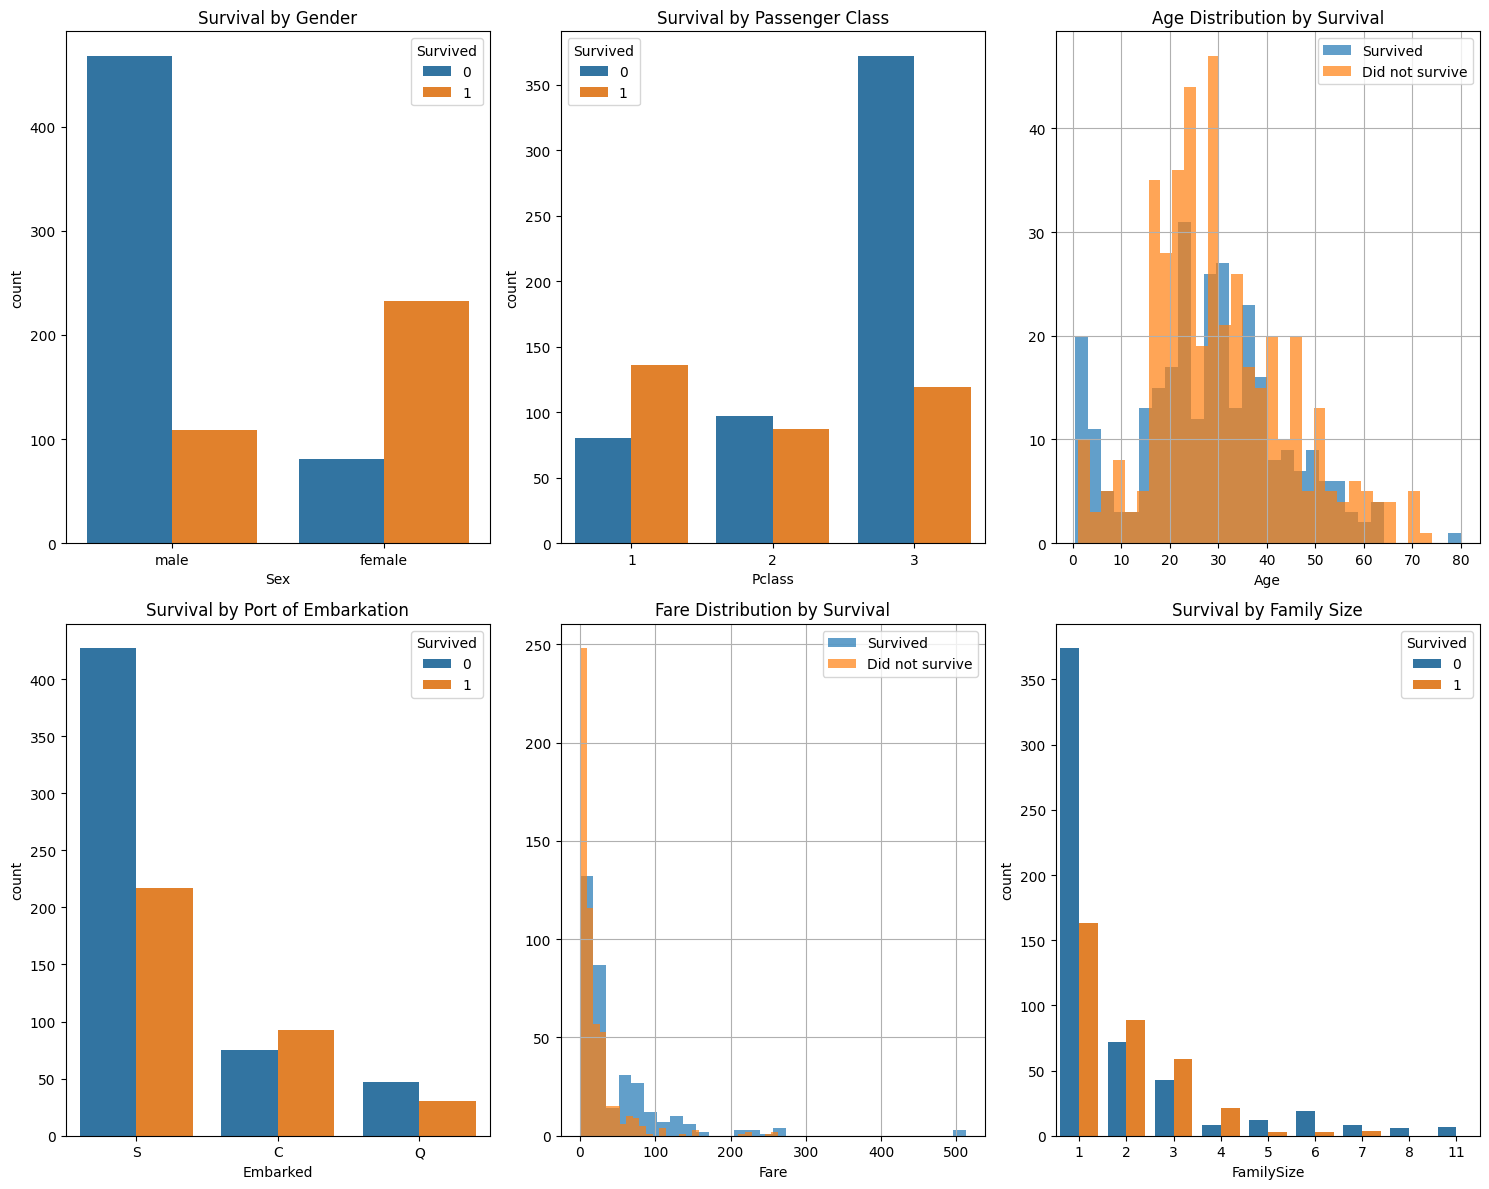

In [19]:
plt.figure(figsize=(15, 12))

# Survival by Gender
plt.subplot(2, 3, 1)
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival by Gender')

# Survival by Class
plt.subplot(2, 3, 2)
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')

# Age Distribution
plt.subplot(2, 3, 3)
train[train['Survived']==1]['Age'].hist(alpha=0.7, label='Survived', bins=30)
train[train['Survived']==0]['Age'].hist(alpha=0.7, label='Did not survive', bins=30)
plt.legend()
plt.title('Age Distribution by Survival')
plt.xlabel('Age')

# Survival by Embarked
plt.subplot(2, 3, 4)
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.title('Survival by Port of Embarkation')

# Fare Distribution
plt.subplot(2, 3, 5)
train[train['Survived']==1]['Fare'].hist(alpha=0.7, label='Survived', bins=30)
train[train['Survived']==0]['Fare'].hist(alpha=0.7, label='Did not survive', bins=30)
plt.legend()
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')

# Family Size vs Survival
plt.subplot(2, 3, 6)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.countplot(data=train, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')

plt.tight_layout()
plt.show()

In [20]:

# Print survival rates by key features
print("\n" + "="*50)
print("SURVIVAL RATES BY FEATURES")
print("="*50)

print("By Gender:")
print(train.groupby('Sex')['Survived'].agg(['count', 'mean']).round(3))

print("\nBy Passenger Class:")
print(train.groupby('Pclass')['Survived'].agg(['count', 'mean']).round(3))

print("\nBy Port of Embarkation:")
print(train.groupby('Embarked')['Survived'].agg(['count', 'mean']).round(3))



SURVIVAL RATES BY FEATURES
By Gender:
        count   mean
Sex                 
female    314  0.742
male      577  0.189

By Passenger Class:
        count   mean
Pclass              
1         216  0.630
2         184  0.473
3         491  0.242

By Port of Embarkation:
          count   mean
Embarked              
C           168  0.554
Q            77  0.390
S           644  0.337


In [21]:
def create_features(df):
    """Create new features for both train and test sets"""
    df = df.copy()
    
    # Family size
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # Is alone
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    # Title extraction from Name
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    # Age groups
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                           labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
    
    # Fare groups
    df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    
    return df

# Apply feature engineering
train_fe = create_features(train)
test_fe = create_features(test)

In [22]:
print("NEW FEATURES CREATED")
print("="*50)
print("Family Size, IsAlone, Title, Age Group, Fare Group")
print("\nTitle distribution:")
print(train_fe['Title'].value_counts())

NEW FEATURES CREATED
Family Size, IsAlone, Title, Age Group, Fare Group

Title distribution:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [23]:
def preprocess_data(train_df, test_df):
    """Preprocess data for modeling"""
    
    # Combine for consistent preprocessing
    combined = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)
    
    # Handle missing values
    # Age: fill with median by Title and Pclass
    combined['Age'] = combined.groupby(['Title', 'Pclass'])['Age'].transform(
        lambda x: x.fillna(x.median()))
    
    # Embarked: fill with mode
    combined['Embarked'] = combined['Embarked'].fillna(combined['Embarked'].mode()[0])
    
    # Fare: fill with median by Pclass
    combined['Fare'] = combined.groupby('Pclass')['Fare'].transform(
        lambda x: x.fillna(x.median()))
    
    # Recreate categorical features after filling missing values
    combined['AgeGroup'] = pd.cut(combined['Age'], bins=[0, 12, 18, 35, 60, 100], 
                                 labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
    combined['FareGroup'] = pd.qcut(combined['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    
    # Select features for modeling
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 
               'FamilySize', 'IsAlone', 'Title', 'AgeGroup', 'FareGroup']
    
    # One-hot encode categorical variables
    combined_encoded = pd.get_dummies(combined[features], prefix_sep='_')
    
    # Split back into train and test
    train_processed = combined_encoded[:len(train_df)]
    test_processed = combined_encoded[len(train_df):]
    
    return train_processed, test_processed

# Preprocess the data
X_train, X_test = preprocess_data(train_fe, test_fe)
y_train = train['Survived']

In [24]:
print(f"Processed test set shape: {X_test.shape}")
print(f"Features: {list(X_train.columns)}")

Processed test set shape: (418, 26)
Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Child', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_Middle', 'AgeGroup_Senior', 'FareGroup_Low', 'FareGroup_Medium', 'FareGroup_High', 'FareGroup_Very High']


In [25]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [26]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    
    print(f"\n{name}:")
    print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Train on full dataset
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    print(f"Training Accuracy: {train_accuracy:.4f}")



Logistic Regression:
CV Accuracy: 0.8272 (+/- 0.0380)
Training Accuracy: 0.8339

Random Forest:
CV Accuracy: 0.8002 (+/- 0.0483)
Training Accuracy: 0.9832


In [27]:

# Get feature importance from Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*50)
print(feature_importance.head(10))



TOP 10 MOST IMPORTANT FEATURES
       feature  importance
4         Fare    0.189435
1          Age    0.177349
14    Title_Mr    0.098119
7   Sex_female    0.085506
8     Sex_male    0.081369
0       Pclass    0.067349
5   FamilySize    0.050540
2        SibSp    0.031871
15   Title_Mrs    0.026366
13  Title_Miss    0.021622


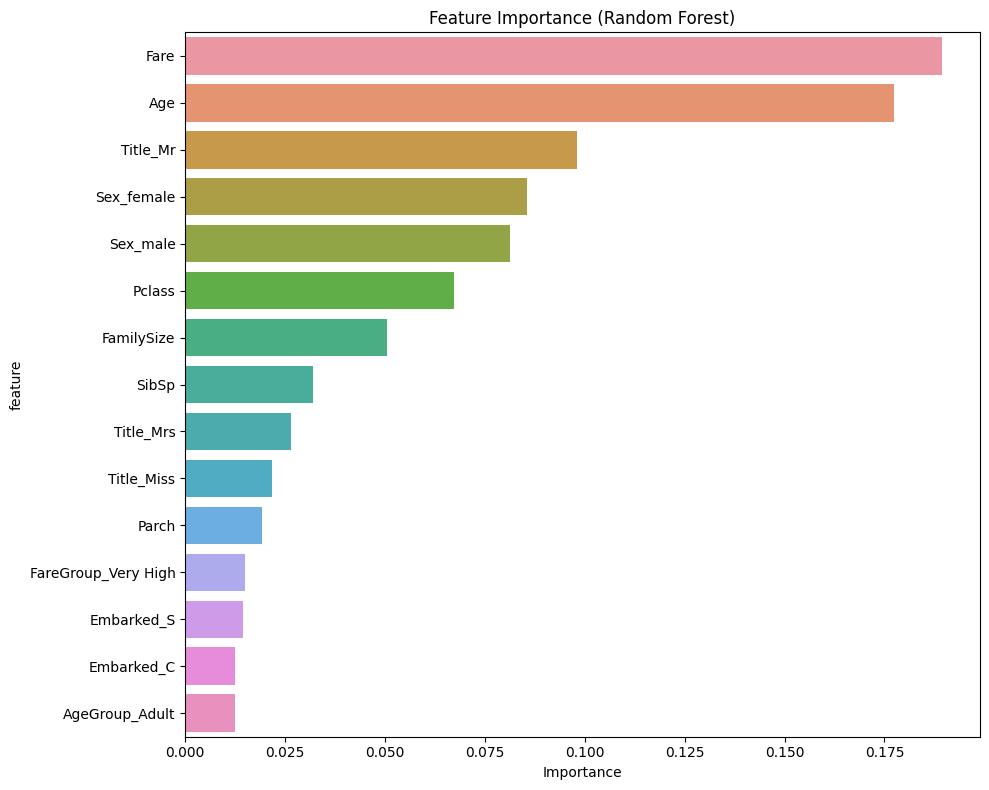

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [29]:
# Use the best performing model (or Random Forest as default)
best_model = models['Random Forest']  # You can change this based on CV results

# Make predictions
predictions = best_model.predict(X_test)

In [30]:
# Create submission file
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

In [31]:
print("\n" + "="*50)
print("PREDICTIONS READY")
print("="*50)
print(f"Submission shape: {submission.shape}")
print(f"Predicted survival rate: {predictions.mean():.2%}")
print("\nFirst few predictions:")
print(submission.head(10))


PREDICTIONS READY
Submission shape: (418, 2)
Predicted survival rate: 40.19%

First few predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0


In [32]:
# Save submission file
submission.to_csv('titanic_submission.csv', index=False)
print("\nSubmission file saved as 'titanic_submission.csv'")

print("\n" + "="*50)
print("NEXT STEPS")
print("="*50)
print("1. Try different models (XGBoost, SVM, etc.)")
print("2. Feature engineering (more creative features)")
print("3. Hyperparameter tuning")
print("4. Ensemble methods")
print("5. Handle outliers")
print("6. Advanced imputation techniques")


Submission file saved as 'titanic_submission.csv'

NEXT STEPS
1. Try different models (XGBoost, SVM, etc.)
2. Feature engineering (more creative features)
3. Hyperparameter tuning
4. Ensemble methods
5. Handle outliers
6. Advanced imputation techniques
